## <font color='blue'> The Sparks Foundation | @ GRIPNovember 2022 </font>

### <font color='black'> Data Science & Business Analytics Tasks </font>

TASK 1- Prediction using Decision Tree Algorithm

In [37]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import sklearn.metrics as sm

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [2]:
import os
os.getcwd()
os.chdir("C:\\Users\\msair\\Downloads") # change directory

In [3]:
iris_df= pd.read_csv('Iris.csv')
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


* Here there is no Null value present in data.

In [5]:
iris_df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
iris_df.shape

(150, 6)

* Here We have 150 Rows / Records (Including Label) and 6 Columns / Attributes.

In [7]:
iris_df.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [8]:
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**Data Cleaning**

In [9]:
iris_df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [10]:
 #Dropping the Id Column as it is not required
iris_df.drop('Id' , axis = 1 , inplace = True) 

In [11]:
print("The total number of rows present in the dataset above is :  ",iris_df.shape[0])
print("The total number of columns/variables present in the dataset above is :  ",iris_df.shape[1])

The total number of rows present in the dataset above is :   150
The total number of columns/variables present in the dataset above is :   5


In [12]:
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


* The Average SepalLengthCm is 5.843333

* The Avetage SepalWidthCm is 3.054000

* The Avetage PetalLengthCm is 3.758667

* The Avetage PetalWidthCm is 1.198667

**Check for duplicate data**

In [13]:
dups = iris_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
iris_df[dups]

Number of duplicate rows = 3


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


**Removing Duplicates**

In [14]:
iris_df.drop_duplicates(inplace=True) 

In [15]:
dups = iris_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(iris_df.shape)

Number of duplicate rows = 0
(147, 5)


**EDA**

In [16]:
iris_num = iris_df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(iris_num.columns.values)
print("Total Numerical Columns = ",len(lstnumericcolumns))

Total Numerical Columns =  4


In [17]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(iris_num[column].describe(),end=' ')
    
    
    plt.figure()
    print("\n")
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(iris_num[column], kde=True, color='y');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=iris_num[column],color='y')
    plt.show()

Description of SepalLengthCm
----------------------------------------------------------------------------
count    147.000000
mean       5.856463
std        0.829100
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: SepalLengthCm, dtype: float64 

Distribution of SepalLengthCm
----------------------------------------------------------------------------


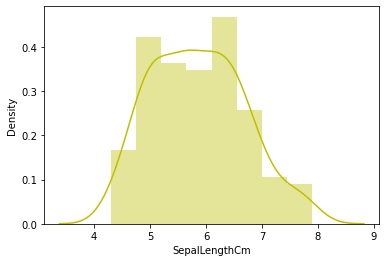

BoxPlot of SepalLengthCm
----------------------------------------------------------------------------


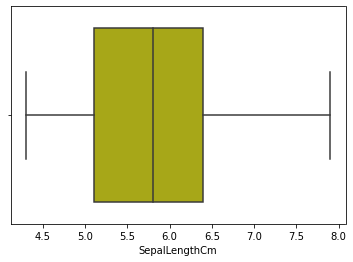

Description of SepalWidthCm
----------------------------------------------------------------------------
count    147.000000
mean       3.055782
std        0.437009
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: SepalWidthCm, dtype: float64 

Distribution of SepalWidthCm
----------------------------------------------------------------------------


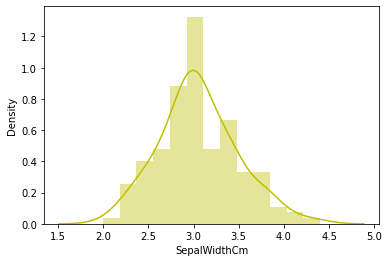

BoxPlot of SepalWidthCm
----------------------------------------------------------------------------


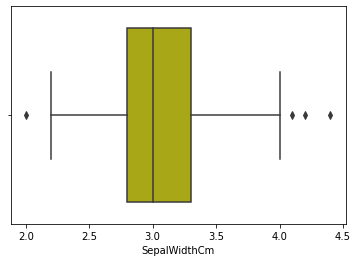

Description of PetalLengthCm
----------------------------------------------------------------------------
count    147.000000
mean       3.780272
std        1.759111
min        1.000000
25%        1.600000
50%        4.400000
75%        5.100000
max        6.900000
Name: PetalLengthCm, dtype: float64 

Distribution of PetalLengthCm
----------------------------------------------------------------------------


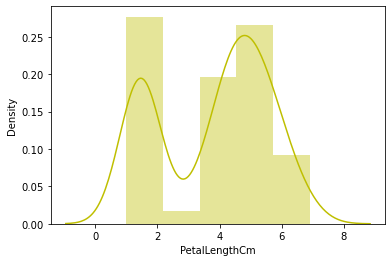

BoxPlot of PetalLengthCm
----------------------------------------------------------------------------


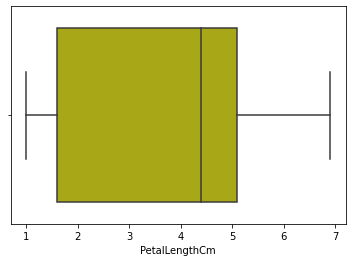

Description of PetalWidthCm
----------------------------------------------------------------------------
count    147.000000
mean       1.208844
std        0.757874
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: PetalWidthCm, dtype: float64 

Distribution of PetalWidthCm
----------------------------------------------------------------------------


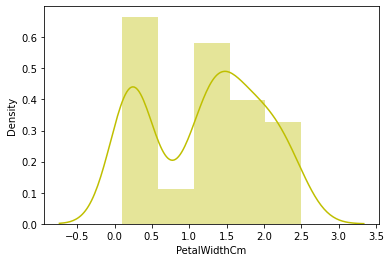

BoxPlot of PetalWidthCm
----------------------------------------------------------------------------


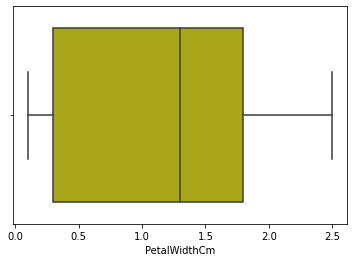

In [18]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

In [19]:
# To remove outliers from 'sepal width (cm)'
q1 = iris_df['SepalWidthCm'].quantile(0.25)
q3 = iris_df['SepalWidthCm'].quantile(0.75) 

In [20]:
# To find the number of rows and columns after outlier treatment
iqr = q3 - q1
iris_df = iris_df[(iris_df['SepalWidthCm'] >= q1-1.5*iqr) & (iris_df['SepalWidthCm'] <= q3+1.5*iqr)]
iris_df.shape # To find out the number of rows and columns after outlier treatment

(143, 5)

We can see that after outlier treatment the number of rows are reduced to 147 from 150

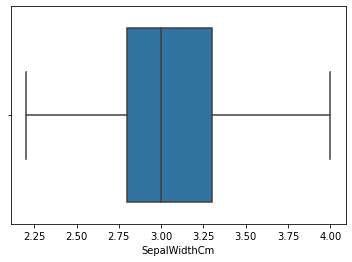

In [21]:
# Boxplot for sepal width (cm) after outlier treatment
sns.boxplot(x = iris_df['SepalWidthCm'])
plt.show()

**Checking for Correlations**

In [22]:
corr = iris_df.corr(method='pearson')
corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.113268,0.879015,0.821715
SepalWidthCm,-0.113268,1.000000,-0.396539,-0.328102
PetalLengthCm,0.879015,-0.396539,1.000000,0.960785
PetalWidthCm,0.821715,-0.328102,0.960785,1.000000


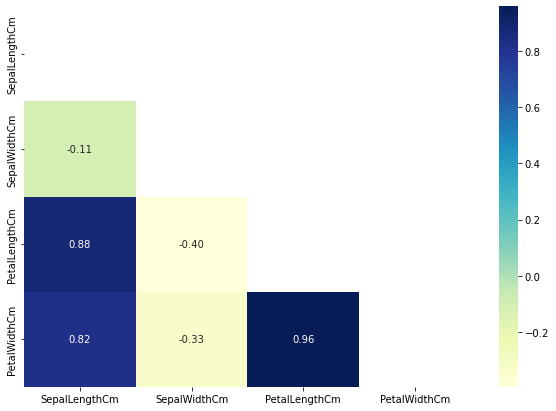

In [23]:
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(10, 7))
sns.heatmap(iris_df.corr(), annot=True,fmt='.2f',mask=mask,cmap='YlGnBu')
plt.show()

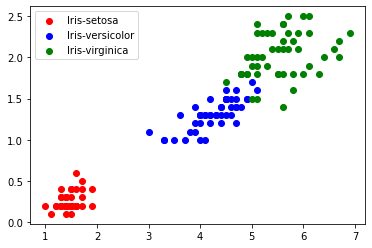

In [24]:
df1 = iris_df[iris_df['Species']=='Iris-setosa']
df2 = iris_df[iris_df['Species']=='Iris-versicolor']
df3 = iris_df[iris_df['Species']=='Iris-virginica']

plt.scatter(df1['PetalLengthCm'],df1['PetalWidthCm'], color='r' , label='Iris-setosa')
plt.scatter(df2['PetalLengthCm'],df2['PetalWidthCm'], color='b', label='Iris-versicolor')
plt.scatter(df3['PetalLengthCm'],df3['PetalWidthCm'], color='g' , label='Iris-virginica ')


plt.legend()
plt.show()

* Thus,from the Heatmap, We can observe that Petal Length(cm) is Higly possitively correlated with Sepal Length(cm) and more negatively correlated with Sepal Width(cm) also Petal Width(cm) is possitively correlated with Sepal Length(cm) and less negatively correlated with Sepal Width(cm).

**Checking pairwise distribution of the continuous variables**

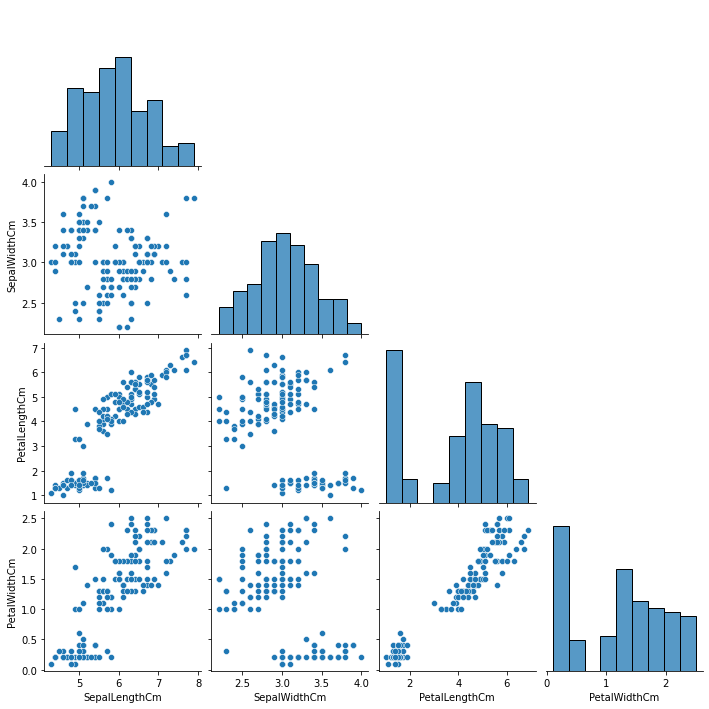

In [25]:
sns.pairplot(iris_df,corner=True)
plt.show() 

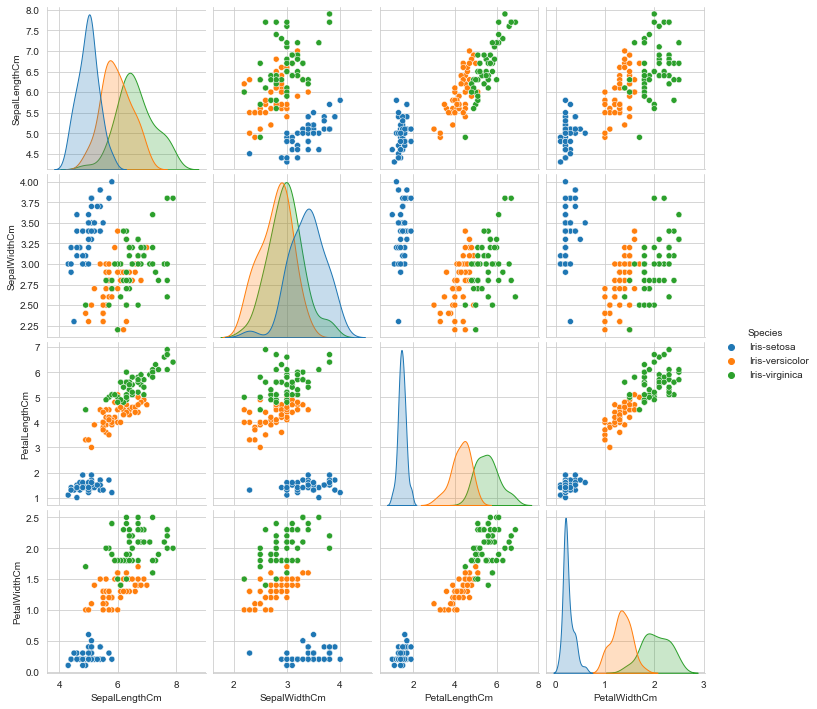

In [26]:
sns.set_style('whitegrid')

sns.pairplot(iris_df,hue='Species')
plt.show()

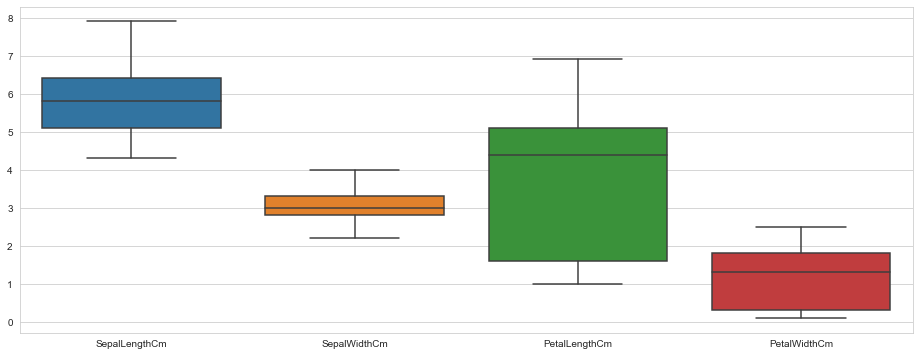

In [27]:
plt.figure(figsize=(16,6))
sns.boxplot(data = iris_df)
plt.show()

**Label Encoding**

In [28]:
for feature in iris_df.columns: 
    if iris_df[feature].dtype == 'object': 
        iris_df[feature] = pd.Categorical(iris_df[feature]).codes

In [29]:
df_dm = iris_df.copy()

In [30]:
x = df_dm.drop("Species" , axis=1)
y = df_dm.pop("Species")

In [31]:
X_train, X_test, train_labels, test_labels = train_test_split(x, y, test_size=.30, random_state=1)

In [32]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (100, 4)
X_test (43, 4)
train_labels (100,)
test_labels (43,)


**Decision Tree algorithm**

* A Decision Tree algorithm has a tree-like structure with each internal node representing an attribute test, each branch representing the test result, and each leaf node representing a class mark. Classification rules are represented by the paths from the root node to the leaf node.

* Root Node: It is a representative sample of the whole population. This further gets divided into two or more homogeneous sets.

* Splitting: It is a process of dividing a node into two or more sub-nodes.

* Decision Node: A decision node is formed when a sub-node splits into more sub-nodes.

* Leaf/Terminal Node: Nodes that do not split are called Leaf or Terminal nodes.

* Pruning: It is the method of removing sub-nodes from a decision node. It is the opposite process of splitting.

* Branch/Sub-Tree: A sub-section of an entire tree is called a branch or sub-tree.

* Parent and Child Node: A node, which is divided into sub-nodes is called the parent node of sub-nodes where sub-nodes are the children of a parent node.

### Building a DECISION TREE CLASSIFIER or CLASSIFICATION AND REGRESSION TREE (CART)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix  

In [34]:
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [35]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier()

In [40]:
# predict 
pred = dt_model.predict(X_test)  

* True Positives (TP) are the correctly predicted positive values which means that the value of actual class is yes and the value of predicted class is also yes.

* True Negatives (TN) are the correctly predicted negative values which means that the value of actual class is no and value of predicted class is also no.

* False Positives (FP) and False Negatives (FN), these values occur when your actual class contradicts with the predicted class.

  * FP: When actual class is no and predicted class is yes.
  * FN: When actual class is yes but predicted class is no.
* Precision or positive predictive value is the fraction of relevant instances among the retrieved instances.

* Recall also known as sensitivity is the fraction of relevant instances that were retrieved. Both precision and recall are * therefore based on relevance.

* F1 score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account.

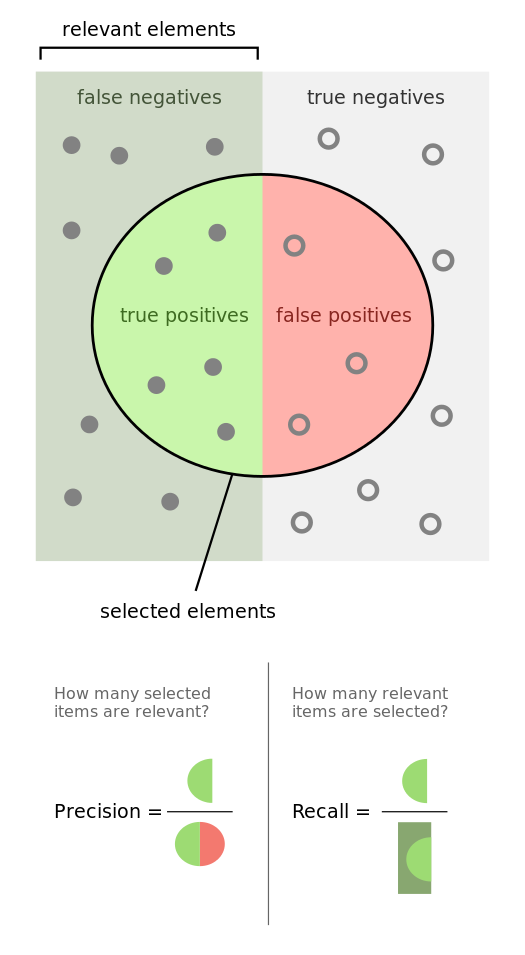

In [41]:
confusion_matrix(test_labels , pred)

array([[17,  0,  0],
       [ 0, 14,  0],
       [ 0,  0, 12]], dtype=int64)

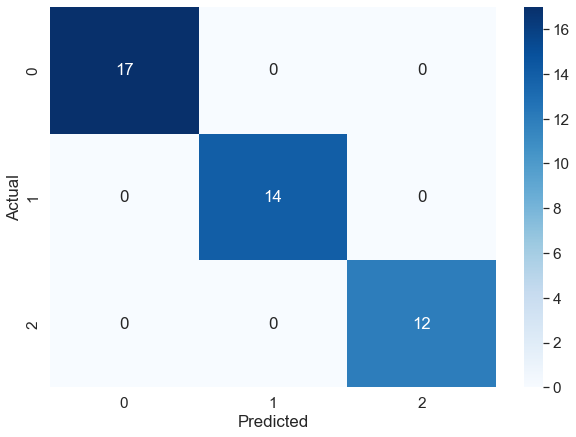

In [45]:
data = confusion_matrix(test_labels, pred)
df_cm = pd.DataFrame(data, columns=np.unique(test_labels), index = np.unique(test_labels))
df_cm.index.name = 'Actual'
df_cm.columns.name= 'Predicted'
plt.figure(figsize=(10,7))
sns.set(font_scale =1.4)
sns.heatmap(df_cm, cmap = "Blues", annot=True) ;

In [46]:
from sklearn import tree
from sklearn.tree import plot_tree

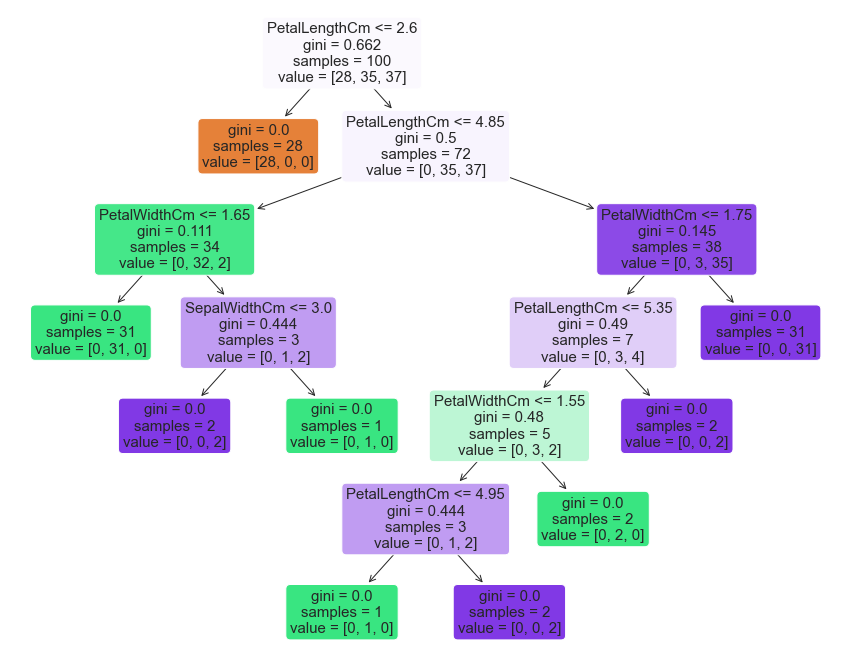

In [47]:
#visualizing the graph
plt.figure(figsize=(15,12))
tree = plot_tree(dt_model,feature_names=df_dm.columns,rounded=True,filled=True,fontsize=15)